# MMClassification Tutorial
Welcome to MMClassification!

In this tutorial, we demo
* How to install MMCls
* How to do inference and feature extraction with MMCls trained weight
* How to train on your own dataset and visualize the results. 
* How to use command line tools

## Install MMClassification
This step may take several minutes.

We use PyTorch 1.5.0 and CUDA 10.1 for this tutorial. You may install other versions by change the version number in pip install command.

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89
gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# Install PyTorch
!pip install -U torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
# Install mmcv
# !pip install mmcv-full
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.5.0/index.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.5.0+cu101 in /home/SENSETIME/shaoyidi/anaconda3/lib/python3.8/site-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6.0+cu101 in /home/SENSETIME/shaoyidi/anaconda3/lib/python3.8/site-packages (0.6.0+cu101)
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.5.0/index.html


In [3]:
# Install mmcls
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification

!pip install -e .

fatal: destination path 'mmclassification' already exists and is not an empty directory.
/home/SENSETIME/shaoyidi/VirtualenvProjects/jupyter_notebook/mmclassification
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///home/SENSETIME/shaoyidi/VirtualenvProjects/jupyter_notebook/mmclassification
  Attempting uninstall: mmcls
    Found existing installation: mmcls 0.8.0
    Uninstalling mmcls-0.8.0:
      Successfully uninstalled mmcls-0.8.0
  Running setup.py develop for mmcls


In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMClassification installation
import mmcls
print(mmcls.__version__)

1.5.0+cu101 True
0.8.0


## Usages of MMCls pretrained models

In some cases, we just want to use the models for some applications without training by ourself, or we may not have enough resources or time to train models. MMCls provides us with many [pretrained models](https://github.com/open-mmlab/mmclassification/blob/master/docs/model_zoo.md), which mainly contains the weights for each layer and save with suffix of '.pth'. Now, let's take a look about what we can do with pretrained models.

### Perform inference
We can classify the existing images using pretrained models. MMCls already provides high level APIs to do inference. To achieve that, there're several steps to do:

1. Download and prepare pretrained models from [here](https://github.com/open-mmlab/mmclassification/blob/master/docs/model_zoo.md).
2. Build models with pretrained weights.
3. Load image and do inference.
4. Visualize the result.

Here, we'll show more details about how it works and use MobileNetV2 as an example.

Assuming we already have some images, then the first thing we should do is to download the pretrained model.

In [5]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth -P checkpoints

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-03-02 15:42:43--  https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
Connecting to 172.16.1.135:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 14206911 (14M) [application/octet-stream]
Saving to: ‘checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth.5’

mobilenet_v2_batch2 100%[===================>]  13.55M  6.18MB/s    in 2.2s    

2021-03-02 15:42:46 (6.18 MB/s) - ‘checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth.5’ saved [14206911/14206911]



Second, we can build `MobileNetV2` with pretrained weights.

In [6]:
from mmcls.apis import inference_model, init_model, show_result_pyplot

# Specify the path to config file and checkpoint file
config_file = 'configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py'
checkpoint_file = 'checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'
# Specify the device. You may also use cpu by `device='cpu'`.
device = 'cuda:0'
# Build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device=device)

Use load_from_local loader


/home/SENSETIME/shaoyidi/VirtualenvProjects/jupyter_notebook/mmclassification/mmcls/apis/inference.py:44: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


Third, load the image and do inference.

In [7]:
# Test a single image
img = 'demo/demo.JPEG'
result = inference_model(model, img)

/home/SENSETIME/shaoyidi/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's checkout the result!

/home/SENSETIME/shaoyidi/VirtualenvProjects/jupyter_notebook/mmclassification/mmcls/models/classifiers/base.py:216: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


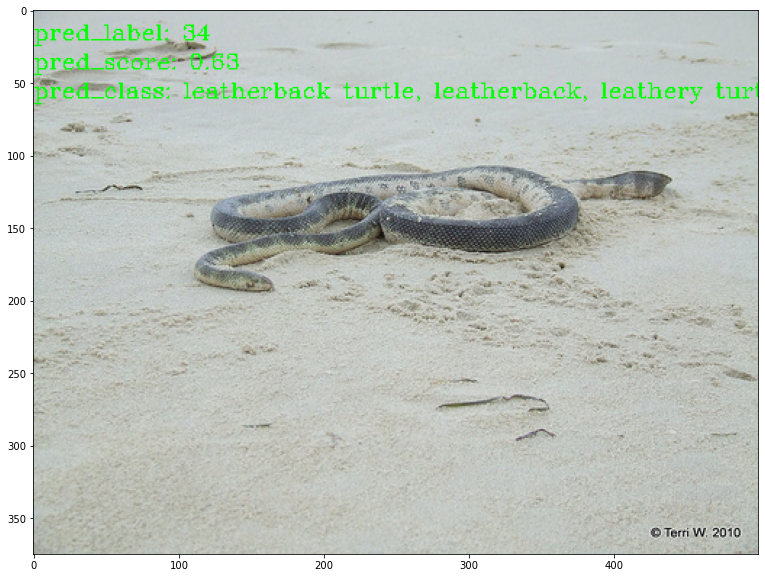

In [8]:
# Show the results
show_result_pyplot(model, img, result)

### Feature extraction

Other than class prediction, we can also use pretrained models to extract feature from images for some downstream tasks. 

MMClassifcation also provides such facilities. 

Assuming we have already built model with pretrained weights, there're more steps to do:

1. Load image according to the pipeline.
2. Forward model and extract feature.

Here, we load image with test pipeline. 

In [9]:
from mmcls.datasets.pipelines import Compose
from mmcv.parallel import collate, scatter

cfg = model.cfg
# Load image
data = dict(img_info=dict(filename=img), img_prefix=None)
test_pipeline = Compose(cfg.data.test.pipeline)
data = test_pipeline(data)
data = collate([data], samples_per_gpu=1)
# Scatter to specified GPU
if next(model.parameters()).is_cuda:
    data = scatter(data, [device])[0]

Then, we can use the API from model to get the feature.

In [10]:
# Forward the model
with torch.no_grad():
    features = model.extract_feat(data['img'])
    print(features.shape)

torch.Size([1, 1280])


## Finetune pretrained model with customized dataset

Finetuning is the process in which parameters of a model would be adjusted very precisely in order to fit with certain dataset. Compared with training, it can can save lots of time and reduce overfitting when the new dataset is small. 

To finetune on a customized dataset, the following steps are neccessary. 

1. Prepare a new dataset. 
2. Support it in MMCls.
3. Create a config file accordingly. 
4. Perform training and evaluation.

More details can be found [here](https://github.com/open-mmlab/mmclassification/blob/master/docs/tutorials/new_dataset.md).



### Prepare dataset

Before we support a new dataset, we need download existing dataset first.

We use [Cats and Dogs dataset](https://www.kaggle.com/tongpython/cat-and-dog) as an example. The dataset consists of 8k images for training and 2k images for testing. There are 2 classes in total, i.e. cat and dog.You may download the dataset from [here](https://www.kaggle.com/tongpython/cat-and-dog) and save to `mmclassification/data/`.

In [11]:
!wget https://www.dropbox.com/s/ckv2398yoy4oiqy/cats_dogs_dataset.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir data
!unzip -q cats_dogs_dataset.zip -d ./data/cats_dogs_dataset/

--2021-03-02 15:43:02--  https://www.dropbox.com/s/ckv2398yoy4oiqy/cats_dogs_dataset.zip?dl=0
Connecting to 172.16.1.135:3128... connected.
Proxy request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ckv2398yoy4oiqy/cats_dogs_dataset.zip [following]
--2021-03-02 15:43:03--  https://www.dropbox.com/s/raw/ckv2398yoy4oiqy/cats_dogs_dataset.zip
Reusing existing connection to www.dropbox.com:443.
Proxy request sent, awaiting response... 302 Found
Location: https://ucea42e5c4de62420d5387cf9629.dl.dropboxusercontent.com/cd/0/inline/BJ5Gqy49BifYWZsMQAvT8jQqJMPrDsKudP8kiAkeC7wwhQdiM5qQT6TdyStuaiNeurj4KJtYPoWfo4Z_OQ0MOWIJet5wunECtftc-ZEpNPO0-JNDEg4NEvBrPH3mU5-inqg/file# [following]
--2021-03-02 15:43:03--  https://ucea42e5c4de62420d5387cf9629.dl.dropboxusercontent.com/cd/0/inline/BJ5Gqy49BifYWZsMQAvT8jQqJMPrDsKudP8kiAkeC7wwhQdiM5qQT6TdyStuaiNeurj4KJtYPoWfo4Z_OQ0MOWIJet5wunECtftc-ZEpNPO0-JNDEg4NEvBrPH3mU5-inqg/file
Connecting to 172.16.1.135:3128... connected.
Proxy request se

The directory of the "Cats and Dogs Dataset" is as follows:
```
data/cats_dogs_dataset
├── training_set
│   ├── training_set
│   │   ├── cats
│   │   │   ├── cat.1.jpg
│   │   │   ├── cat.2.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.1.jpg
│   │   │   ├── dog.2.jpg
│   │   │   ├── ...
├── test_set
│   ├── test_set
│   │   ├── cats
│   │   │   ├── cat.4001.jpg
│   │   │   ├── cat.4002.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.4001.jpg
│   │   │   ├── dog.4002.jpg
│   │   │   ├── ...
```

You may also check the structure of dataset by `tree data/cats_dogs_dataset`.

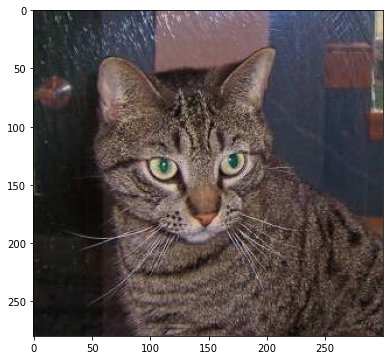

In [12]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### Support a new dataset

Datasets in MMClassification require image and ground-truth labels to be placed in folders with the same perfix. To support a new dataset, there're two ways to generate a customized dataset. 

The simplest way is to convert the dataset to existing dataset formats (ImageNet). The other way is to add new Dataset class. More details can be found [here](https://github.com/open-mmlab/mmclassification/blob/master/docs/tutorials/new_dataset.md).

In this tutorials, we'll show the details about both of the methods.

#### Reorganize dataset to existing format

This is the simplest way to support a new dataset. To do this, there're two steps:

1. Reorganize the structure of customized dataset to the existing dataset formats.
2. Generate annotation files accordingly.

Here we take "Cats and Dogs Dataset" as an example. 

First, let's reorganize the structure. Before converting it into the format of ImageNet, let's have a quit look about the structure of ImageNet. 

For training, it differentiates classes by folders, i.e. images with the same label should be in the same folder and all the folders of different classes should be in one folder:

```
imagenet
├── ...
├── train
│   ├── n01440764
│   │   ├── n01440764_10026.JPEG
│   │   ├── n01440764_10027.JPEG
│   │   ├── ...
│   ├── ...
│   ├── n15075141
│   │   ├── n15075141_999.JPEG
│   │   ├── n15075141_9993.JPEG
│   │   ├── ...
```


Luckily, our training dataset has similar structure and we don't have to do anything on it.

Note: The `ImageNet` dataset class in MMCls will scan the directory of the training set and map each folders, i.e. the class name, to its label automatically. 

For validating, we need to extract validation dataset from our training dataset. Here's how we split the dataset.

In [26]:
import shutil
import os
import os.path as osp


data_root = './data/cats_dogs_dataset/'
train_dir = osp.join(data_root, 'training_set/training_set/')
val_dir = osp.join(data_root, 'val_set/val_set/')

# Split train/val set
mmcv.mkdir_or_exist(val_dir)
class_dirs = [
    d for d in os.listdir(train_dir) if osp.isdir(osp.join(train_dir, d))
]
for cls_dir in class_dirs:
    train_imgs = [filename for filename in mmcv.scandir(osp.join(train_dir, cls_dir), suffix='.jpg')]
    # Select first 4/5 as train set and the last 1/5 as val set
    train_length = int(len(train_imgs)*4/5)
    val_imgs = train_imgs[train_length:]
    # Move the val set into a new dir
    src_dir = osp.join(train_dir, cls_dir)
    tar_dir = osp.join(val_dir, cls_dir)
    mmcv.mkdir_or_exist(tar_dir)
    for val_img in val_imgs:
        shutil.move(osp.join(src_dir, val_img), osp.join(tar_dir, val_img))

For test set, there's nothing to change. 

Second, we need to generate the annotations for validation and test dataset. The classes of the dataset are also needed.

In [27]:
import shutil
import os
import os.path as osp

from itertools import chain


# Generate mapping from class_name to label
def find_folders(root_dir):
    folders = [
        d for d in os.listdir(root_dir) if osp.isdir(osp.join(root_dir, d))
    ]
    folders.sort()
    folder_to_idx = {folders[i]: i for i in range(len(folders))}
    return folder_to_idx


# Generate annotations
def gen_annotations(root_dir):
    annotations = dict()
    folder_to_idx = find_folders(root_dir)
    
    for cls_dir, label in folder_to_idx.items():
        cls_to_label = [
            '{} {}'.format(osp.join(cls_dir, filename), label) 
            for filename in mmcv.scandir(osp.join(root_dir, cls_dir), suffix='.jpg')
        ]
        annotations[cls_dir] = cls_to_label
    return annotations


data_root = './data/cats_dogs_dataset/'
val_dir = osp.join(data_root, 'val_set/val_set/')
test_dir = osp.join(data_root, 'test_set/test_set/')
    
# Save val annotations
with open(osp.join(data_root, 'val.txt'), 'w') as f:
    annotations = gen_annotations(val_dir)
    contents = chain(*annotations.values())
    f.writelines('\n'.join(contents))
    
# Save test annotations
with open(osp.join(data_root, 'test.txt'), 'w') as f:
    annotations = gen_annotations(test_dir)
    contents = chain(*annotations.values())
    f.writelines('\n'.join(contents))

# Generate classes
folder_to_idx = find_folders(train_dir)
classes = list(folder_to_idx.keys())
with open(osp.join(data_root, 'classes.txt'), 'w') as f:
    f.writelines('\n'.join(classes))

Each line of the annotation list contains a filename and its corresponding ground-truth label. The format is as follows:

```
...
cats/cat.3769.jpg 0
cats/cat.882.jpg 0
...
dogs/dog.3881.jpg 1
dogs/dog.3377.jpg 1
...
```

#### Implement a customized dataset

The second method to support a new dataset is to write a new Dataset class `CatsDogsDataset`. In this method, we don't have to change the structure of the dataset. The following steps are needed:

1. Generate class list. Each line is the class name. E.g.
    ```
    cats
    dogs
    ```
2. Generate train/validation/test annotations. Each line contains a filename and its corresponding ground-truth label.
    ```
    ...
    cats/cat.436.jpg 0
    cats/cat.383.jpg 0
    ...
    dogs/dog.1340.jpg 1
    dogs/dog.1660.jpg 1
    ...
    ```
3. Implement `CatsDogsDataset` inherited from `BaseDataset`, and overwrite `load_annotations(self)`,
like [CIFAR10](https://github.com/open-mmlab/mmclassification/blob/master/mmcls/datasets/cifar.py) and [ImageNet](https://github.com/open-mmlab/mmclassification/blob/master/mmcls/datasets/imagenet.py).

First, let's generate class list and annotation files.

In [13]:
# Generate annotations
import os
import mmcv
import os.path as osp

from itertools import chain


# Generate mapping from class_name to label
def find_folders(root_dir):
    folders = [
        d for d in os.listdir(root_dir) if osp.isdir(osp.join(root_dir, d))
    ]
    folders.sort()
    folder_to_idx = {folders[i]: i for i in range(len(folders))}
    return folder_to_idx


# Generate annotations
def gen_annotations(root_dir):
    annotations = dict()
    folder_to_idx = find_folders(root_dir)
    
    for cls_dir, label in folder_to_idx.items():
        cls_to_label = [
            '{} {}'.format(osp.join(cls_dir, filename), label) 
            for filename in mmcv.scandir(osp.join(root_dir, cls_dir), suffix='.jpg')
        ]
        annotations[cls_dir] = cls_to_label
    return annotations


data_root = './data/cats_dogs_dataset/'
train_dir = osp.join(data_root, 'training_set/training_set/')
test_dir = osp.join(data_root, 'test_set/test_set/')

# Generate class list
folder_to_idx = find_folders(train_dir)
classes = list(folder_to_idx.keys())
with open(osp.join(data_root, 'classes.txt'), 'w') as f:
    f.writelines('\n'.join(classes))
    
# Generate train/val set randomly
annotations = gen_annotations(train_dir)
# Select first 4/5 as train set
train_length = lambda x: int(len(x)*4/5)
train_annotations = map(lambda x:x[:train_length(x)], annotations.values())
val_annotations = map(lambda x:x[train_length(x):], annotations.values())
# Save train/val annotations
with open(osp.join(data_root, 'train.txt'), 'w') as f:
    contents = chain(*train_annotations)
    f.writelines('\n'.join(contents))
with open(osp.join(data_root, 'val.txt'), 'w') as f:
    contents = chain(*val_annotations)
    f.writelines('\n'.join(contents))
    
# Save test annotations
test_annotations = gen_annotations(test_dir)
with open(osp.join(data_root, 'test.txt'), 'w') as f:
    contents = chain(*test_annotations.values())
    f.writelines('\n'.join(contents))

Then, we need to implement `load_annotations` function in the new dataset class `CatsDogsDataset`.

Typically, this function returns a list, where each sample is a dict, containing necessary data informations, e.g., `img_path` and `gt_label`. These will be used by `mmcv.runner` during training to load samples. 

In [14]:
import mmcv
import numpy as np

from mmcls.datasets import DATASETS, BaseDataset


# Regist model so that we can access the class through str in configs
@DATASETS.register_module()
class CatsDogsDataset(BaseDataset):

    def load_annotations(self):
        assert isinstance(self.ann_file, str)

        data_infos = []
        with open(self.ann_file) as f:
            # The ann_file is the annotation files we generate above.
            samples = [x.strip().split(' ') for x in f.readlines()]
            for filename, gt_label in samples:
                info = {'img_prefix': self.data_prefix}
                info['img_info'] = {'filename': filename}
                info['gt_label'] = np.array(gt_label, dtype=np.int64)
                data_infos.append(info)
            return data_infos

### Modify configs

In this part, we need to modify the config for finetune. 

In MMCls, the configs usually look like this:

```
# 'configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py'
_base_ = [
    # Model config
    '../_base_/models/mobilenet_v2_1x.py',
    # Dataset config
    '../_base_/datasets/imagenet_bs32_pil_resize.py',
    # Schedule config
    '../_base_/schedules/imagenet_bs256_epochstep.py',
    # Runtime config
    '../_base_/default_runtime.py'
]
```

A standard configuration in MMCls contains four parts:

1. Model config, which specify the basic structure of the model, e.g. number of the input channels.
2. Dataset config, which contains details about the dataset, e.g. type of the dataset.
3. Schedule config, which specify the training schedules, e.g. learning rate.
4. Runtime config, which contains the rest of details, e.g. log config.

In this part, we'll show how to modify config in python files. 

First, let's load the existing config file.

In [15]:
# Load the existing config file
from mmcv import Config
cfg = Config.fromfile('configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py')

Then, we'll modify it according to the method we support our new dataset. 

#### Modify config after reorganization of dataset
If you reorganize the dataset and convert it into ImageNet format, there's little things to change.

First is the model configs. The classification head would be reconstructed if `num_classes` is different from the pretrained one.

In [16]:
# Modify num classes of the model in classification head
cfg.model.head.num_classes = 2
cfg.model.head.topk = (1)

Second is the dataset configs. As we reorganize the dataset into the format of ImageNet, we can use most of the configurations of it. Note that the training annotations don't need to specify, because it can find the mappings through the structure of the dataset.

In [28]:
# Modify the number of workers according to your computer
cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu=2
# Modify the image normalization configs 
cfg.img_norm_cfg = dict(
    mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)
# Specify the path to training set
cfg.data.train.data_prefix = 'data/cats_dogs_dataset/training_set/training_set'
cfg.data.train.classes = 'data/cats_dogs_dataset/classes.txt'
# Specify the path to validation set
cfg.data.val.data_prefix = 'data/cats_dogs_dataset/val_set/val_set'
cfg.data.val.ann_file = 'data/cats_dogs_dataset/val.txt'
cfg.data.val.classes = 'data/cats_dogs_dataset/classes.txt'
# Specify the path to test set
cfg.data.test.data_prefix = 'data/cats_dogs_dataset/test_set/test_set'
cfg.data.test.ann_file = 'data/cats_dogs_dataset/test.txt'
cfg.data.test.classes = 'data/cats_dogs_dataset/classes.txt'
# Modify the metric method
cfg.evaluation['metric_options']={'topk': (1)}

Third is the schedules of finetuning.

In [29]:
# Optimizer
cfg.optimizer = dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0001)
cfg.optimizer_config = dict(grad_clip=None)
# Learning policy
cfg.lr_config = dict(policy='step', step=[1])
cfg.runner = dict(type='EpochBasedRunner', max_epochs=2)

Finally, let's modify the configuration during run time.

In [30]:
# Load the pretrained weights
cfg.load_from = 'checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'
# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/cats_dogs_dataset'

from mmcls.apis import set_random_seed
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

Have a look on the new configuration! 

In [31]:
# Let's have a look at the final config used for finetuning
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='ImageClassifier',
    backbone=dict(type='MobileNetV2', widen_factor=1.0),
    neck=dict(type='GlobalAveragePooling'),
    head=dict(
        type='LinearClsHead',
        num_classes=1000,
        in_channels=1280,
        loss=dict(type='CrossEntropyLoss', loss_weight=1.0),
        topk=(1, 5)))
dataset_type = 'ImageNet'
img_norm_cfg = dict(
    mean=[124.508, 116.05, 106.438], std=[58.577, 57.31, 57.437], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', size=224, backend='pillow'),
    dict(type='RandomFlip', flip_prob=0.5, direction='horizontal'),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='ToTensor', keys=['gt_label']),
    dict(type='Collect', keys=['img', 'gt_label'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize'

#### Modify config after implementing a customized dataset
As we implement a new dataset, there're something different from above:
1. The new dataset type should be specified.
2. The training annotations should be specified.

First, let's have a look about the dataset configurations.

In [21]:
# Specify the new dataset class
cfg.dataset_type = 'CatsDogsDataset'
cfg.data.train.type = cfg.dataset_type
cfg.data.val.type = cfg.dataset_type
cfg.data.test.type = cfg.dataset_type

# Specify the training annotations
cfg.data.train.ann_file = 'data/cats_dogs_dataset/train.txt'

# The followings are the same as above
cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu=2

cfg.img_norm_cfg = dict(
    mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)

cfg.data.train.data_prefix = 'data/cats_dogs_dataset/training_set/training_set'
cfg.data.train.classes = 'data/cats_dogs_dataset/classes.txt'

cfg.data.val.data_prefix = 'data/cats_dogs_dataset/training_set/training_set'
cfg.data.val.ann_file = 'data/cats_dogs_dataset/val.txt'
cfg.data.val.classes = 'data/cats_dogs_dataset/classes.txt'

cfg.data.test.data_prefix = 'data/cats_dogs_dataset/test_set/test_set'
cfg.data.test.ann_file = 'data/cats_dogs_dataset/test.txt'
cfg.data.test.classes = 'data/cats_dogs_dataset/classes.txt'
# Modify the metric method
cfg.evaluation['metric_options']={'topk': (1)}


Other configurations are the same as those mentioned above. And we just list them here.

In [22]:
# MODOL CONFIG
# Modify num classes of the model in classification head
cfg.model.head.num_classes = 2
cfg.model.head.topk = (1)

# SCHEDULE CONFIG
# Optimizer
cfg.optimizer = dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0001)
cfg.optimizer_config = dict(grad_clip=None)
# Learning policy
cfg.lr_config = dict(policy='step', step=[1])
cfg.runner = dict(type='EpochBasedRunner', max_epochs=2)

# RUNTIME CONFIG
# Load the pretrained weights
cfg.load_from = 'checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'
# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/cats_dogs_dataset'
from mmcls.apis import set_random_seed
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='ImageClassifier',
    backbone=dict(type='MobileNetV2', widen_factor=1.0),
    neck=dict(type='GlobalAveragePooling'),
    head=dict(
        type='LinearClsHead',
        num_classes=2,
        in_channels=1280,
        loss=dict(type='CrossEntropyLoss', loss_weight=1.0),
        topk=1))
dataset_type = 'CatsDogsDataset'
img_norm_cfg = dict(
    mean=[124.508, 116.05, 106.438], std=[58.577, 57.31, 57.437], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', size=224, backend='pillow'),
    dict(type='RandomFlip', flip_prob=0.5, direction='horizontal'),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='ToTensor', keys=['gt_label']),
    dict(type='Collect', keys=['img', 'gt_label'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize',

### Finetune

Now we finetune on our own dataset. As we've modified the training schedules, we can use the `train_model` API to finetune our model. 

In [23]:
import time

from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# Build the classifier
model = build_classifier(cfg.model)
# Build the dataset
datasets = [build_dataset(cfg.data.train)]
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES
# Begin finetuning
train_model(
    model,
    datasets,
    cfg,
    distributed=False,
    validate=True,
    timestamp=time.strftime('%Y%m%d_%H%M%S', time.localtime()),
    meta=dict())

2021-03-02 15:46:17,276 - mmcls - INFO - load checkpoint from checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
2021-03-02 15:46:17,277 - mmcls - INFO - Use load_from_local loader
2021-03-02 15:46:17,302 - mmcls - WARNING - The model and loaded state dict do not match exactly

size mismatch for head.fc.weight: copying a param with shape torch.Size([1000, 1280]) from checkpoint, the shape in current model is torch.Size([2, 1280]).
size mismatch for head.fc.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([2]).
2021-03-02 15:46:17,304 - mmcls - INFO - Start running, host: SENSETIME\shaoyidi@CN0014004140L, work_dir: /home/SENSETIME/shaoyidi/VirtualenvProjects/jupyter_notebook/mmclassification/work_dirs/cats_dogs_dataset
2021-03-02 15:46:17,305 - mmcls - INFO - workflow: [('train', 1)], max: 2 epochs
2021-03-02 15:46:37,060 - mmcls - INFO - Epoch [1][100/201]	lr: 1.000e-02, eta: 0:00:59, time: 0.196, data_time: 0.0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 366.1 task/s, elapsed: 4s, ETA:     0s

2021-03-02 15:46:59,167 - mmcls - INFO - Epoch(val) [1][201]	accuracy: 79.2005
2021-03-02 15:47:18,976 - mmcls - INFO - Epoch [2][100/201]	lr: 1.000e-03, eta: 0:00:19, time: 0.197, data_time: 0.024, memory: 1719, loss: 0.4395, top-1: 78.8438
2021-03-02 15:47:36,638 - mmcls - INFO - Epoch [2][200/201]	lr: 1.000e-03, eta: 0:00:00, time: 0.177, data_time: 0.003, memory: 1719, loss: 0.3949, top-1: 81.3438
2021-03-02 15:47:36,689 - mmcls - INFO - Saving checkpoint at 2 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 368.1 task/s, elapsed: 4s, ETA:     0s

2021-03-02 15:47:41,107 - mmcls - INFO - Epoch(val) [2][201]	accuracy: 88.3823


Let's checkout our trained model.

<Figure size 576x432 with 0 Axes>

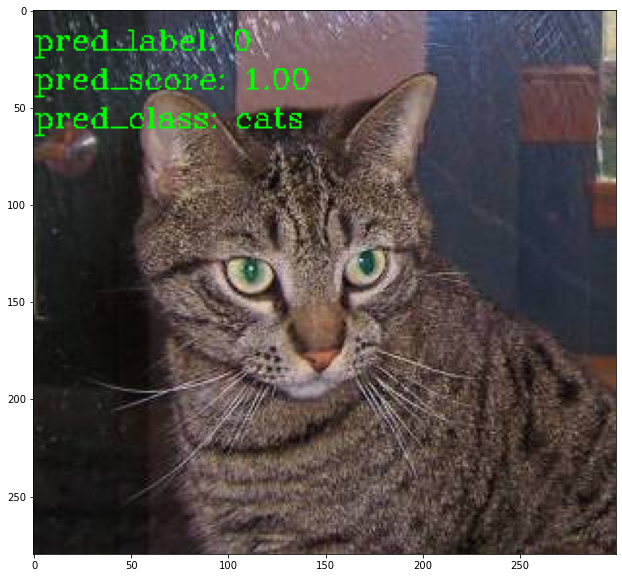

In [24]:
img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

model.cfg = cfg
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result)

## Command line tool usages

MMCls also provide some useful command line tools, which can help us:

1. Train models
2. Finetune models
3. Test models
4. Do inference 

As the process of training is similar to finetuning, we'll show the details about how to finetune, test, and do inference in this tutorials. More details can be found [here](https://github.com/open-mmlab/mmclassification/blob/master/docs/getting_started.md).

### Finetune

To finetune via command line, several steps are needed:
1. Prepare customized dataset.
2. Support new dataset in MMCls.
3. Modify configs and write into files.
4. Finetune using command line.

The first and second step are similar to those mentioned above. In this part, we'll show the details of the last two steps.

#### Modify configs in files

To reuse the common parts among different configs, we support inheriting configs from multiple existing configs. To finetune a MobileNetV2 model, the new config needs to inherit `configs/_base_/models/mobilenet_v2_1x.py` to build the basic structure of the model. To use the "Cats and Dogs Dataset", the new config can also simply inherit `configs/_base_/datasets/cats_dogs_dataset.py`. To customize the training schedules, the new config should inherit `configs/_base_/schedules/cats_dogs_finetune.py`. For runtime settings such as training schedules, the new config needs to inherit `configs/_base_/default_runtime.py`.

The final config file should look like this:

```
# Save to "configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py"
_base_ = [
    '../_base_/models/mobilenet_v2_1x.py',
    '../_base_/datasets/imagenet_bs32_pil_resize.py',
    '../_base_/schedules/imagenet_bs256_epochstep.py',
    '../_base_/default_runtime.py'
]

```

Besides, you can also choose to write the whole contents into one config file rather than use inheritance, e.g. `configs/mnist/lenet5.py`.

Here, we take the settings of reorganizion as an example. You can try by yourself on the case of implementing a customized dataset. All you have to do is to write new configs which will overwrite the original ones. Now, let's check the details.

First, let's modify the model configs and save them into `configs/_base_/models/mobilenet_v2_1x_cats_dogs.py`. The new config needs to modify the head according to the class numbers of the new datasets. By only changing `num_classes` in the head, the weights of the pre-trained models are mostly reused except the final prediction head.

```python
_base_ = ['./mobilenet_v2_1x.py']
model = dict(
    head=dict(
        num_classes=2,
        topk = (1)
    ))
```

Second is the dataset's configs. Don't forget to save them into `configs/_base_/datasets/cats_dogs_dataset.py`.

```python
_base_ = ['./imagenet_bs32.py']
img_norm_cfg = dict(
     mean=[124.508, 116.050, 106.438],
     std=[58.577, 57.310, 57.437],
     to_rgb=True)

data = dict(
    # Modify the number of workers according to your computer
    samples_per_gpu = 32,
    workers_per_gpu=2,
    # Specify the path to training set
    train = dict(
        data_prefix = 'data/cats_dogs_dataset/training_set/training_set',
        classes = 'data/cats_dogs_dataset/classes.txt'
    ),
    # Specify the path to validation set
    val = dict(
        data_prefix = 'data/cats_dogs_dataset/val_set/val_set',
        ann_file = 'data/cats_dogs_dataset/val.txt',
        classes = 'data/cats_dogs_dataset/classes.txt'
    ),
    # Specify the path to test set
    test = dict(
        data_prefix = 'data/cats_dogs_dataset/test_set/test_set',
        ann_file = 'data/cats_dogs_dataset/test.txt',
        classes = 'data/cats_dogs_dataset/classes.txt'
    )
)
# Modify the metric method
evaluation = dict(metric_options={'topk': (1)})

```

Third is the training schedule. The finetuning hyperparameters vary from the default schedule. It usually requires smaller learning rate and less training epochs. Let's save it into `configs/_base_/schedules/cats_dogs_finetune.py`.

```python
# optimizer
# lr is set for a batch size of 128
optimizer = dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0001)
optimizer_config = dict(grad_clip=None)
# learning policy
lr_config = dict(
    policy='step',
    step=[1])
runner = dict(type='EpochBasedRunner', max_epochs=2)
```

Finally, for the run time configs, we can simple use the defualt one and change nothing. We can now gather all the configs into one file and save it into `configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py`.
```python
_base_ = [
    '../_base_/models/mobilenet_v2_1x_cats_dogs.py', '../_base_/datasets/cats_dogs_dataset.py',
    '../_base_/schedules/cats_dogs_finetune.py', '../_base_/default_runtime.py'
]

# Don't forget to load pretrained model. Set it as the abosolute path. 
load_from = 'XXX/mmclassification/checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'
```


#### Finetune using command line

We use `tools/train.py` to finetune the model:

```
python tools/train.py ${CONFIG_FILE} [optional arguments]
```

If you want to specify the working directory in the command, you can add an argument `--work_dir ${YOUR_WORK_DIR}`.

Here, we take our `MobileNetV2` on `CatsDogsDataset` for example.

In [30]:
!python tools/train.py configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py --work-dir work_dirs/mobilenet_v2_1x_cats_dogs

2021-03-02 15:49:52,543 - mmcls - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.8.5 (default, Sep  4 2020, 07:30:14) [GCC 7.3.0]
CUDA available: True
GPU 0: GeForce GTX 1060 6GB
CUDA_HOME: /usr
NVCC: Cuda compilation tools, release 10.2, V10.2.89
GCC: gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609
PyTorch: 1.5.0+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gen

### Test models

We use `tools/test.py` to test models:

```
python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [optional arguments]
```

We show several optional arguments we'll use here:

- `--metrics`: Evaluation metrics, which depends on the dataset, e.g., accuracy.
- `--metric-options`: Custom options for evaluation, e.g. topk=1.

Please refer to `tools.test.py` for details about optional arguments.

Here's the example of our `MobileNetV2`.

In [31]:
!python tools/test.py configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py work_dirs/mobilenet_v2_1x_cats_dogs/latest.pth --metrics=accuracy --metric-options=topk=1

Use load_from_local loader
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2023/2023, 528.3 task/s, elapsed: 4s, ETA:     0s
accuracy : 95.01


### Do inference

We can use the following commands to infer a dataset and save the results.

```shell
python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [--out ${RESULT_FILE}]
```

Optional arguments:

- `RESULT_FILE`: Filename of the output results. If not specified, the results will not be saved to a file.

Here's the example of our `MobileNetV2`.

In [32]:
!python tools/test.py configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py work_dirs/mobilenet_v2_1x_cats_dogs/latest.pth --out=results.json

Use load_from_local loader
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2023/2023, 536.2 task/s, elapsed: 4s, ETA:     0stools/test.py:138: UserWarning: Evaluation metrics are not specified.
  warnings.warn('Evaluation metrics are not specified.')

writing results to results.json
